Plotting the graph of 6 indices

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


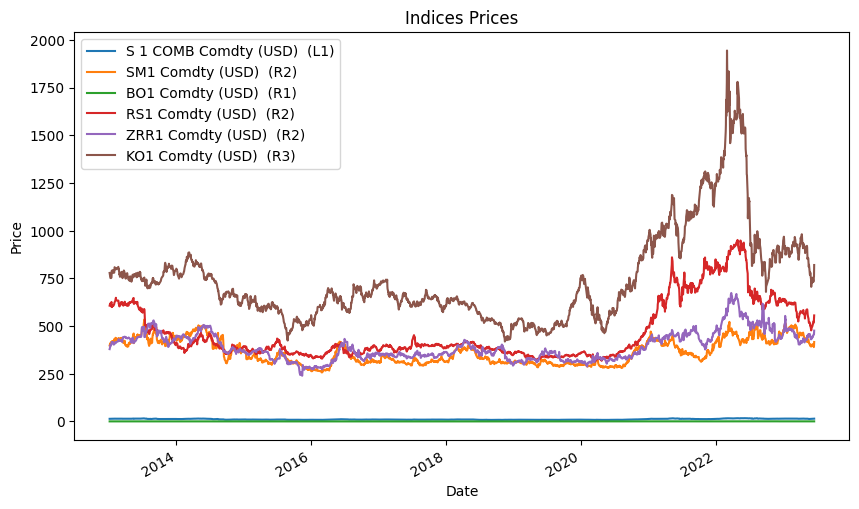

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Provide the path to your Excel file
file_path = '/content/drive/MyDrive/Finance project Python/cleaned_dataofSixPrices.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Extract the relevant columns for plotting
columns = ['Date', 'S 1 COMB Comdty (USD)  (L1)', 'SM1 Comdty (USD)  (R2)', 'BO1 Comdty (USD)  (R1)',
           'RS1 Comdty (USD)  (R2)', 'ZRR1 Comdty (USD)  (R2)', 'KO1 Comdty (USD)  (R3)']
df = df[columns]

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the time series
df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Indices Prices')
plt.legend(loc='upper left')
plt.show()


Plotting the returns of the six indices

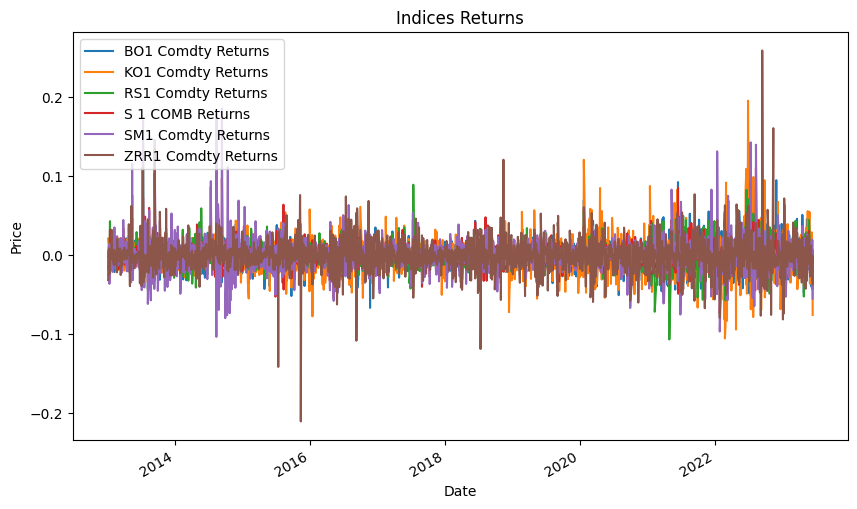

In [ ]:
# Provide the path to your Excel file
file_path = '/content/drive/MyDrive/Finance project Python/Data/Returns of six indices.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Extract the relevant columns for plotting
columns = ['Date', 'BO1 Comdty Returns', 'KO1 Comdty Returns', 'RS1 Comdty Returns',
           'S 1 COMB Returns', 'SM1 Comdty Returns', 'ZRR1 Comdty Returns']
df = df[columns]

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the time series
df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Indices Returns')
plt.legend(loc='upper left')
plt.show()


In [ ]:
pip install pandas numpy statsmodels


In [ ]:
!pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 16.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/Finance project Python/Data/Returns of six indices.xlsx')

# Extract the vegetable oil returns columns
returns_columns = ['BO1 Comdty Returns',
                   'KO1 Comdty Returns',
                   'RS1 Comdty Returns',
                   'S 1 COMB Returns',
                   'SM1 Comdty Returns',
                   'ZRR1 Comdty Returns']
returns_data = df[returns_columns]

# Fill missing values with forward fill
returns_data = returns_data.ffill()

# Calculate descriptive statistics
statistics = {
    'Maximum': returns_data.max(),
    'Minimum': returns_data.min(),
    'Standard deviation': returns_data.std(),
    'Skewness': returns_data.skew(),
    'Kurtosis': returns_data.kurtosis(),
    'Jarque-Bera': np.asarray(sm.stats.jarque_bera(returns_data)),
    'Q(5)': returns_data.quantile(0.05),
    'Q(10)': returns_data.quantile(0.1),
    'Q(20)': returns_data.quantile(0.2),
    'ARCH (5)': np.asarray([arch_model(returns_data[column], vol='Garch', p=5).fit().conditional_volatility.values[-1] for column in returns_columns]),
    'ARCH (10)': np.asarray([arch_model(returns_data[column], vol='Garch', p=10).fit().conditional_volatility.values[-1] for column in returns_columns]),
    'ARCH (20)': np.asarray([arch_model(returns_data[column], vol='Garch', p=20).fit().conditional_volatility.values[-1] for column in returns_columns]),
    'ADF': np.asarray([sm.tsa.adfuller(returns_data[column])[0] for column in returns_columns]),
    'P-P': np.asarray([sm.ProbPlot(returns_data[column]).qqplot(line='s')[1][0] for column in returns_columns])
}

# Print the descriptive statistics
for stat, values in statistics.items():
    print(f"{stat}:")
    print(values)
    print()


ValueError: ignored